
📊 Σημασία Χαρακτηριστικών στο Σετ Δεδομένων Καρδιοπάθειας
✨ Εισαγωγή στην Επεξηγήσιμη Τεχνητή Νοημοσύνη (XAI)
Στη σύγχρονη εποχή, η Τεχνητή Νοημοσύνη (AI) διαμορφώνει το μέλλον της λήψης αποφάσεων σε κρίσιμους τομείς όπως η υγεία, τα χρηματοοικονομικά και η βιομηχανία. Ωστόσο, τα μοντέλα μηχανικής μάθησης λειτουργούν συχνά ως "μαύρα κουτιά" — μας δίνουν προβλέψεις χωρίς να εξηγούν πώς κατέληξαν σε αυτές.

Εδώ έρχεται η Επεξηγήσιμη Τεχνητή Νοημοσύνη (XAI).
Η XAI μας επιτρέπει να κατανοούμε και να εμπιστευόμαστε τις αποφάσεις των μοντέλων, διασφαλίζοντας διαφάνεια, υπευθυνότητα και ασφάλεια.

🚑 Γιατί είναι σημαντική η XAI στην Υγεία;
Φανταστείτε ένα μοντέλο AI που προβλέπει ότι ένας ασθενής έχει καρδιοπάθεια, ενώ όλες οι ιατρικές εξετάσεις δείχνουν ότι είναι υγιής.
Θα εμπιστευόμασταν αυτή την απόφαση χωρίς να ξέρουμε το "γιατί";
Φυσικά και όχι.

Σε ευαίσθητους τομείς όπως η ιατρική, ένα λανθασμένο αποτέλεσμα μπορεί να κοστίσει ανθρώπινες ζωές.
Χρειαζόμαστε:

Να ξέρουμε γιατί έγινε η συγκεκριμένη πρόβλεψη.

Να καταλάβουμε ποιοι παράγοντες επηρέασαν την απόφαση.

Η XAI μάς παρέχει τα εργαλεία για να "ανοίξουμε" το μαύρο κουτί και να κατανοήσουμε τις προβλέψεις, χτίζοντας έτσι εμπιστοσύνη ανάμεσα σε γιατρούς, ασθενείς και τεχνολογία.

📚 Διατύπωση του Προβλήματος
Στο πλαίσιο αυτής της μελέτης, θέλουμε να:

Ανακαλύψουμε ποια χαρακτηριστικά (όπως ηλικία, αρτηριακή πίεση, επίπεδα χοληστερίνης) παίζουν τον πιο σημαντικό ρόλο στην πρόβλεψη καρδιοπάθειας.

Οπτικοποιήσουμε και ερμηνεύσουμε τη συμπεριφορά του μοντέλου χρησιμοποιώντας τεχνικές XAI.

Στόχος μας είναι να κάνουμε το μοντέλο διαφανές και κατανοητό σε όλους, ειδικά όταν το διακύβευμα είναι η ανθρώπινη ζωή.

🔥 Σημασία Χαρακτηριστικών
Η ανάλυση της σημασίας των χαρακτηριστικών μας βοηθά να εντοπίσουμε ποιοι παράγοντες επηρεάζουν περισσότερο την πρόβλεψη καρδιοπάθειας.
Για παράδειγμα, χαρακτηριστικά όπως:

Ο τύπος του πόνου στο στήθος

Τα επίπεδα σακχάρου στο αίμα

Η μέγιστη καρδιακή συχνότητα μπορεί να έχουν πολύ μεγαλύτερη βαρύτητα από άλλα.

Η σωστή κατανόηση αυτών των παραγόντων:

Βοηθάει στην καλύτερη διάγνωση

Ενισχύει την εμπιστοσύνη στα συστήματα τεχνητής νοημοσύνης

Παρέχει χρήσιμες πληροφορίες στους ιατρικούς επαγγελματίες



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


In [2]:
!pip install eli5
!pip install pdpbox
!pip install shap

ERROR: Could not find a version that satisfies the requirement pdpbox (from versions: none)
ERROR: No matching distribution found for pdpbox


In [3]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance
import warnings
import eli5
import shap
from eli5.sklearn import PermutationImportance

from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

2025-04-27 13:14:08.187671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745759648.390707      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745759648.447948      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Φόρτωση του αρχείου δεδομένων
data = pd.read_csv('../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

# Εμφάνιση των 5 πρώτων γραμμών του πίνακα
data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# Στατιστική περίληψη των αριθμητικών χαρακτηριστικών του συνόλου δεδομένων
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
data.shape


(297, 14)

In [7]:
# Αντιγραφή του αρχικού πίνακα δεδομένων
heart = data.copy()

# Ορισμός της μεταβλητής-στόχου
target = 'condition'

# Λίστα με όλα τα χαρακτηριστικά (εκτός του στόχου)
features_list = list(heart.columns)
features_list.remove(target)

# Διαχωρισμός χαρακτηριστικών και στόχου
y = heart.pop('condition')

# Διαχωρισμός σε σετ εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(heart, y, test_size=0.2, random_state=33)

# Εμφάνιση του μεγέθους των σετ
X_train.shape, X_test.shape


((237, 13), (60, 13))

In [8]:
%%time

# Εκπαίδευση μοντέλου XGBoost 
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)


CPU times: user 89.2 ms, sys: 8.66 ms, total: 97.9 ms
Wall time: 82.2 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=33, ...)

In [9]:
xgb_predictions = xgb.predict(X_test)


In [10]:
import eli5
from eli5.sklearn import PermutationImportance

# Υπολογισμός της σημασίας χαρακτηριστικών με Permutation Importance
perm = PermutationImportance(xgb, random_state=33).fit(X_test, y_test)

# Εμφάνιση των κορυφαίων 15 χαρακτηριστικών
eli5.show_weights(perm, top=15)


Weight,Feature
0.0833 ± 0.0632,x11
0.0733 ± 0.0581,x12
0.0300 ± 0.0646,x9
0.0300 ± 0.0133,x1
0.0233 ± 0.0340,x7
0.0133 ± 0.0389,x2
0.0067 ± 0.0400,x8
0.0067 ± 0.0340,x4
0.0033 ± 0.0327,x10
-0.0067 ± 0.0400,x0


Το διάγραμμα που βλέπεις δείχνει τα πιο σημαντικά χαρακτηριστικά του συνόλου δεδομένων καρδιοπάθειας. Τα τρία πιο σημαντικά χαρακτηριστικά είναι τα εξής:

1. cp (Τύπος Πόνου Στο Στήθος)
Υπάρχουν τέσσερις τύποι άγγειας (Angina), ανάλογα με τον αριθμό των συμπτωμάτων που βιώνει ο ασθενής:

0 - Τυπική Άγγεια (Typical Angina): Όλα τα 3 κύρια συμπτώματα της Άγγειας εμφανίζονται.

1 - Ατυπική Άγγεια (Atypical Angina): 2 από τα 3 κύρια συμπτώματα της Άγγειας εμφανίζονται.

2 - Μη Άγγειος Πόνος (Non-Anginal Pain): Ένα σύμπτωμα εμφανίζεται.

3 - Ασυμπτωματικός (Asymptomatic): Δεν υπάρχουν συμπτώματα.

Η σοβαρότητα της Άγγειας είναι η εξής:

Τυπική Άγγεια < Ατυπική Άγγεια < Μη Άγγειος Πόνος < Ασυμπτωματικός

2. thal (Δοκιμασία Θάλλιου)
Η δοκιμασία Θάλλιου χρησιμοποιείται για να ελέγξει πόσο αίμα φτάνει σε διάφορα μέρη της καρδιάς χρησιμοποιώντας ραδιοϊσοτόπο. Βοηθά τους γιατρούς να ελέγξουν την παροχή αίματος στην καρδιά.

0 - Κανονικά αποτελέσματα (Normal results): Δεν υπάρχουν επιπλοκές.

1 - Σταθερό Ελάττωμα (Fixed Defect): Η παροχή αίματος είναι αποκλεισμένη σε ένα ή περισσότερα μέρη της καρδιάς.

2 - Αντιστρέψιμο Ελάττωμα (Reversible Defect): Η παροχή αίματος είναι αποκλεισμένη σε κάποια μέρη, αλλά ανακάμπτει μετά από κάποιο διάστημα, οπότε δεν είναι μόνιμο.

3. ca (Αριθμός αποκλεισμένων αγγείων)
Η καρδιά έχει τρία βασικά αγγεία για την παροχή αίματος. Χρησιμοποιώντας αγγειογραφία, ο γιατρός μπορεί να δει πόσα από αυτά τα αγγεία είναι αποκλεισμένα.

0 - Κανένα αγγείο δεν είναι αποκλεισμένο.

1 - Ένα αγγείο είναι αποκλεισμένο.

2 - Δύο αγγεία είναι αποκλεισμένα.

3 - Τρία αγγεία είναι αποκλεισμένα.

Αυτά τα χαρακτηριστικά είναι σημαντικά για την εκτίμηση του κινδύνου καρδιοπάθειας και βοηθούν τους γιατρούς να κατανοήσουν τη σοβαρότητα της κατάστασης του ασθενούς.

In [11]:
# Ορισμός του δείγματος για το οποίο θέλουμε να δούμε τις προβλέψεις
tgt = 6

# Εκτύπωση της πραγματικής τιμής από το σύνολο δεδομένων δοκιμής
print('Αναφορά:', y_test.iloc[tgt])

# Εκτύπωση της προβλεπόμενης τιμής από το μοντέλο XGBoost
print('Προβλεπόμενο:', xgb_predictions[tgt])

# Εμφάνιση της εξήγησης της πρόβλεψης για το δείγμα tgt
eli5.show_prediction(xgb.get_booster(), X_test.iloc[tgt], 
                     feature_names=list(heart.columns), show_feature_values=True)


Αναφορά: 1
Προβλεπόμενο: 1


In [12]:
%%time

# Πρέπει να εκπαιδεύσουμε ένα νέο μοντέλο με πίνακες (arrays),
# καθώς το eli5 έχει ένα σφάλμα με τα DataFrames και το XGBoost.
# Αναλυτικές πληροφορίες εδώ: https://github.com/TeamHG-Memex/eli5/pull/261
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train.values, y_train)


CPU times: user 63.6 ms, sys: 6.62 ms, total: 70.2 ms
Wall time: 36.1 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=33, ...)

In [13]:
# Εκπαίδευση ενός μοντέλου απόφασης (Decision Tree) με τυχαία αρχικοποίηση
model = DecisionTreeClassifier(random_state=1)
model = model.fit(X_train, y_train)

# Υπολογισμός της σημασίας των χαρακτηριστικών μέσω Permutation Importance
permutation = PermutationImportance(model, random_state=33).fit(X_train, y_train)

# Εμφάνιση των 30 πιο σημαντικών χαρακτηριστικών με εξήγηση μέσω eli5
eli5.show_weights(permutation, feature_names=features_list, top=30)


Weight,Feature
0.2025 ± 0.0509,thal
0.1899 ± 0.0381,ca
0.1266 ± 0.0350,age
0.0785 ± 0.0157,chol
0.0734 ± 0.0174,cp
0.0658 ± 0.0182,trestbps
0.0363 ± 0.0086,thalach
0.0346 ± 0.0216,oldpeak
0.0295 ± 0.0075,sex
0.0253 ± 0.0213,restecg


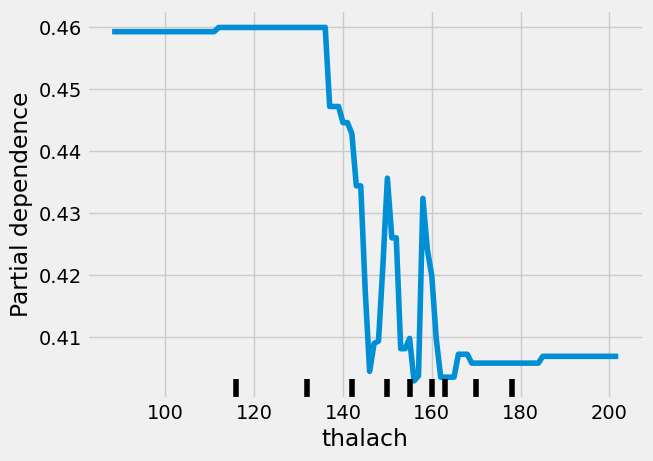

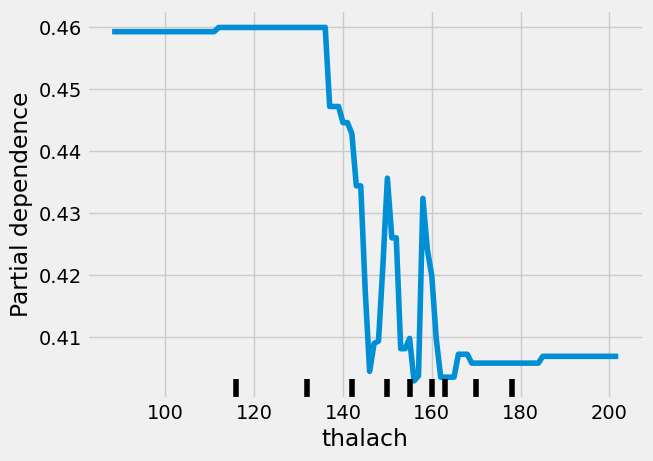

In [14]:
from sklearn.inspection import PartialDependenceDisplay

# Δημιουργία του PDP για το χαρακτηριστικό 'thalach'
disp = PartialDependenceDisplay.from_estimator(xgb, X_train, features=['thalach'])

# Εμφάνιση του διαγράμματος
disp.plot()
plt.show()


In [24]:
# Εγκατάσταση της βιβλιοθήκης SHAP (αν δεν είναι ήδη εγκατεστημένη)
# !pip install shap

# Εισαγωγή της βιβλιοθήκης SHAP
import shap

# Φόρτωση του JavaScript για την οπτικοποίηση των αποτελεσμάτων στο notebook
shap.initjs()

# Δημιουργία ενός Explainer για το μοντέλο XGBoost (χρησιμοποιείται για μοντέλα τύπου δέντρου όπως XGBoost)
explainer = shap.TreeExplainer(xgb)

# Υπολογισμός των SHAP values για τα δεδομένα του X_test
# Τα SHAP values δείχνουν την επίδραση κάθε χαρακτηριστικού στη συγκεκριμένη πρόβλεψη του μοντέλου
shap_values = explainer.shap_values(X_test)

# Δημιουργία DataFrame από τα SHAP values για ευκολότερη επεξεργασία και ανάλυση
X_shap = pd.DataFrame(shap_values)

# Προβολή των πρώτων 5 γραμμών του DataFrame με τα SHAP values
X_shap.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.530328,0.374889,0.886942,-1.086791,-0.168900,0.117441,-0.666420,-0.732156,-0.080467,-1.968874,-0.331278,0.769340,0.497759
1,-1.080705,-0.442695,-0.661030,-0.203645,-0.642092,0.066434,-0.198880,-0.612413,-0.232445,-0.426216,0.752881,-1.260250,-1.314777
2,-0.057662,-0.641528,1.119166,0.493788,0.430705,-0.321819,0.264099,0.615448,0.599191,1.369970,0.248666,2.113606,1.164642
3,-0.063630,0.295052,0.861320,0.301204,0.352746,0.080101,-0.283035,0.673347,0.577415,1.656562,0.558013,1.668038,1.180086
4,-0.249838,-0.633290,1.157896,0.438818,0.000182,0.077852,0.344556,-0.183642,-0.331475,1.262144,0.181037,2.086468,1.044841


In [25]:
# Εκτύπωση της αναμενόμενης τιμής του μοντέλου
# Η αναμενόμενη τιμή είναι η μέση πρόβλεψη του μοντέλου πριν λάβουμε υπόψη τα χαρακτηριστικά κάθε παρατήρησης
print('Αναμενόμενη Τιμή: ', explainer.expected_value)


Αναμενόμενη Τιμή:  -0.36281365


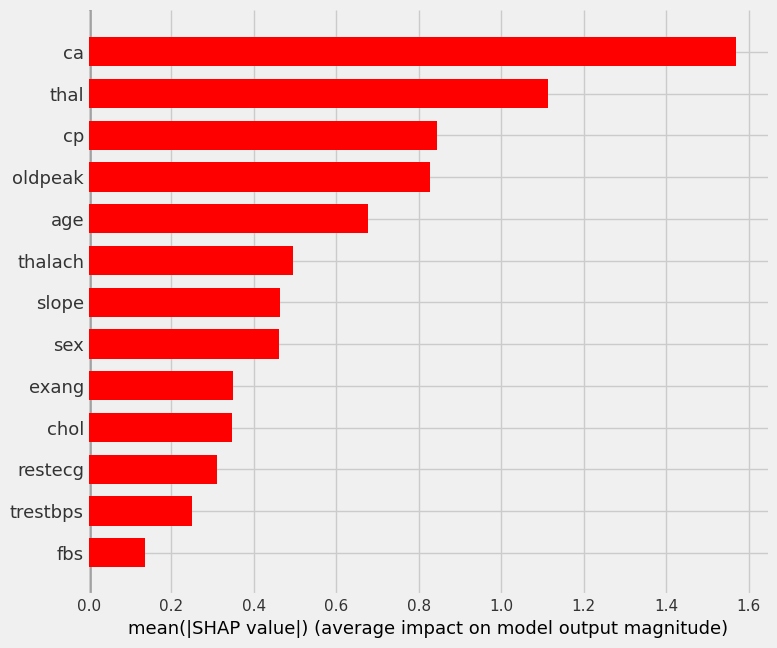

In [26]:
# Δημιουργία ενός γραμμικού διαγράμματος (bar plot) για τα SHAP values
# Το 'shap_values' περιέχει τις τιμές SHAP για το σύνολο δεδομένων X_test
# Η παράμετρος 'plot_type="bar"' καθορίζει ότι θέλουμε να δημιουργήσουμε γραμμικό διάγραμμα
# Η παράμετρος 'color='red'' καθορίζει το χρώμα των μπαρών στο διάγραμμα (κόκκινο)
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')


In [18]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])


In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[6,:], X_test.iloc[6,:])

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[15,:], X_test.iloc[15,:])


Έχουμε εξετάσει δύο ακραίες περιπτώσεις. Τώρα, ας δούμε μια περίπτωση όπου το μοντέλο προέβλεψε ότι ο ασθενής πάσχει από αγγινά αλλά το αποτέλεσμα δεν είναι τόσο προφανές. Ας εξετάσουμε τα τρία πιο σημαντικά χαρακτηριστικά.

ca = 0: Αυτό δείχνει ότι δεν υπάρχουν μπλοκαρισμένα αγγεία. Αυτό είναι καλό σημάδι και οδηγεί το μοντέλο στο να πιστέψει ότι ο ασθενής δεν έχει καρδιοπάθεια.

thal = 0: Αντιδρώντας στην τιμή του ca, η δοκιμή θαλίου δείχνει ότι υπάρχουν κάποιες ανωμαλίες στην παροχή αίματος και τα κύτταρα της καρδιάς του ασθενούς. Αυτό είναι ένα πολύ καλό παράδειγμα που δείχνει ότι στην πραγματική ζωή, τα αποτελέσματα είναι πιο συχνά μικτά, παρά απόλυτα ξεκάθαρα.

cp = 3: Ο ασθενής πάσχει από τύπο θωρακικού πόνου 3 (ασυμπτωματικός πόνος). Αυτό ακούγεται αντίθετο προς την διαίσθηση, αλλά ο ασυμπτωματικός πόνος είναι στην πραγματικότητα ο πιο σοβαρός από τους τέσσερις τύπους θωρακικού πόνου. Έτσι, αυτό οδηγεί το μοντέλο στο να κάνει την πρόβλεψη ότι ο ασθενής έχει καρδιοπάθεια.

Χρησιμοποιώντας την SHAP, έχουμε δει δύο ακραίες περιπτώσεις με τον ίδιο τρόπο όπως με την LIME. Τώρα, ας δούμε μια τοπική εξήγηση που δεν είναι τόσο ακραία. Βλέπουμε έναν καλό συνδυασμό κόκκινων και μπλε τιμών χαρακτηριστικών από το διάγραμμα που εμφανίζεται παραπάνω. Ας εξετάσουμε και τις δύο περιπτώσεις ξεχωριστά:

Τα πιο σημαντικά χαρακτηριστικά που επηρεάζουν την πρόβλεψη ότι ο ασθενής έχει καρδιοπάθεια:
thal = 2: Αυτό δείχνει ότι υπάρχουν κάποια ελαττώματα στην παροχή αίματος και την ποιότητα των κυττάρων της καρδιάς του ασθενούς.

cp = 3: Ο τύπος θωρακικού πόνου είναι ασυμπτωματικός. Αν και μπορεί να ακούγεται παράδοξο, ο ασυμπτωματικός πόνος είναι στην πραγματικότητα ο πιο σοβαρός από τους τέσσερις τύπους, κάτι που οδηγεί το μοντέλο να πιστέψει ότι ο ασθενής έχει καρδιοπάθεια.

chol = 307: Υψηλή χοληστερόλη οδηγεί σε απόφραξη των αιμοφόρων αγγείων της καρδιάς και μειώνει τη συνολική ροή αίματος γύρω από την καρδιά.

Το πιο σημαντικό χαρακτηριστικό που οδηγεί το μοντέλο στο να πιστέψει ότι ο ασθενής δεν έχει καρδιοπάθεια:
ca = 0: Αυτό είναι ίσως το πιο σημαντικό χαρακτηριστικό, και από αυτό συνειδητοποιούμε ότι κανένα από τα αγγεία του ασθενούς δεν είναι μπλοκαρισμένο.

In [21]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

Αυτός είναι ένας γενικός τρόπος εξήγησης των προβλέψεων του μοντέλου. Ο αριθμός -0.3918 είναι η βάση (base value), που προκύπτει από τις τιμές SHAP. Αυτό σημαίνει ότι, αν η συνολική τιμή είναι μεγαλύτερη από -0.3918, τότε το μοντέλο προβλέπει ότι ο ασθενής έχει την ασθένεια. Αν η τιμή είναι μικρότερη από -0.3918, τότε το μοντέλο προβλέπει ότι ο ασθενής δεν έχει την ασθένεια.

Η μπλε περιοχή του γραφήματος τραβάει την πρόβλεψη προς τα κάτω, δηλαδή μειώνει την πιθανότητα ο ασθενής να έχει την ασθένεια.

Η κόκκινη περιοχή αυξάνει την πρόβλεψη, δηλαδή ενισχύει την πιθανότητα να έχει ο ασθενής την ασθένεια.

Αυτό σημαίνει ότι, αν σε μία περίπτωση υπάρχουν περισσότερα χαρακτηριστικά με κόκκινη τιμή (που είναι "θετικά" για την ασθένεια), τότε η πρόβλεψη του μοντέλου θα είναι πιο πιθανό να δείξει 1 (δηλαδή ο ασθενής έχει την ασθένεια). Αν, αντίθετα, υπάρχουν περισσότερα χαρακτηριστικά με μπλε τιμή, τότε η πρόβλεψη θα είναι πιο πιθανό να δείξει 0 (δηλαδή ο ασθενής δεν έχει την ασθένεια).

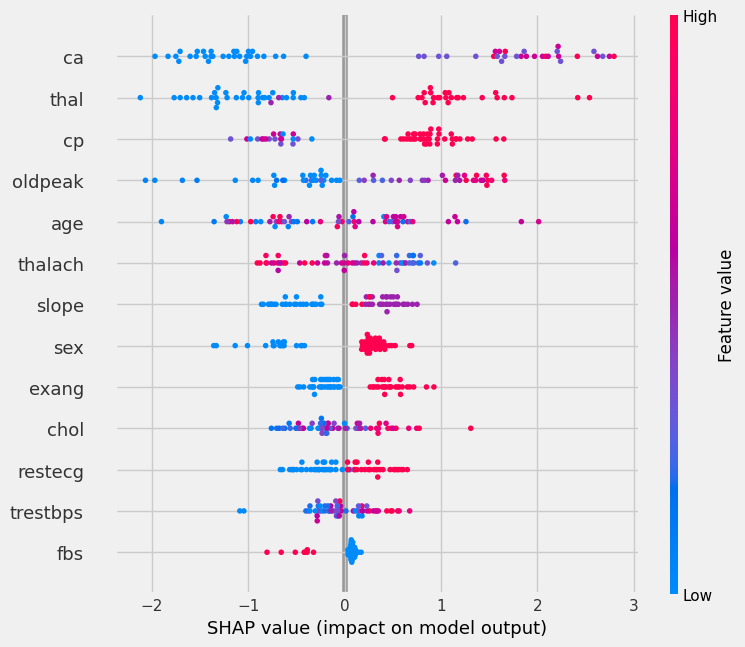

In [22]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

Το χρώμα αντιπροσωπεύει την τιμή του χαρακτηριστικού. (Το μπλε σημαίνει χαμηλή τιμή, το μωβ σημαίνει τη μέση τιμή και το κόκκινο σημαίνει υψηλή τιμή).

Για παράδειγμα, στο χαρακτηριστικό ca (αριθμός μπλοκαρισμένων αγγείων), παρατηρούμε ότι όταν τα σημεία είναι μπλε, η τιμή SHAP είναι αρνητική, δηλαδή η πρόβλεψη είναι πιο πιθανό να δείξει ότι ο ασθενής δεν έχει ασθένεια. Όταν τα σημεία είναι κόκκινα και μωβ, οι τιμές SHAP είναι κυρίως θετικές, δηλαδή η πρόβλεψη δείχνει ότι ο ασθενής έχει την ασθένεια.

Αυτό σημαίνει ότι όταν δεν υπάρχουν μπλοκαρισμένα αγγεία (μπλε σημεία), οι πιθανότητες να έχει ο ασθενής ασθένεια είναι χαμηλές. Ωστόσο, καθώς ο αριθμός των μπλοκαρισμένων αγγείων αυξάνεται, οι πιθανότητες να έχει ο ασθενής καρδιοπάθεια επίσης αυξάνονται.

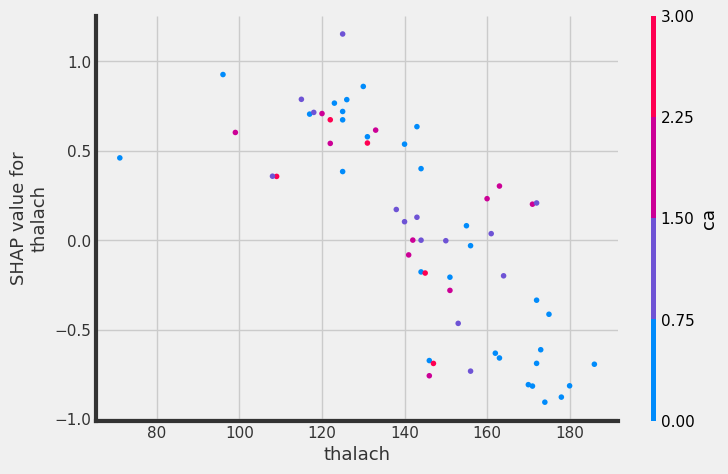

In [23]:
shap.initjs()
shap.dependence_plot(ind='thalach', interaction_index='ca',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

In [ ]:
Αυτό το διάγραμμα scatter δείχνει τη σχέση μεταξύ δύο χαρακτηριστικών, καθώς και τις τιμές SHAP.

Ο άξονας X δείχνει την τιμή του thalach (μέγιστος καρδιακός ρυθμός).

Ο άξονας Y δείχνει τις τιμές SHAP.

Το χρώμα κάθε σημείου δείχνει την τιμή του χαρακτηριστικού ca (αριθμός μπλοκαρισμένων αγγείων).

Συχνά, οι τιμές SHAP είναι χαμηλές όταν η τιμή του ca είναι χαμηλή, δηλαδή όταν δεν υπάρχουν μπλοκαρισμένα αγγεία. Επίσης, παρατηρούμε μία ελαφριά τάση, όπου οι τιμές SHAP μειώνονται καθώς η τιμή του thalach αυξάνεται, δηλαδή καθώς ο μέγιστος καρδιακός ρυθμός αυξάνεται, η πρόβλεψη του μοντέλου τείνει να δείχνει λιγότερο πιθανό ότι ο ασθενής έχει καρδιοπάθεια.